In [28]:
import numpy
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout 
from keras.utils import np_utils 
import matplotlib.pyplot as plt

In [4]:
# fix random seed for reproducibility 
seed = 7 
numpy.random.seed(seed) 
#load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train[0].shape


(28, 28)

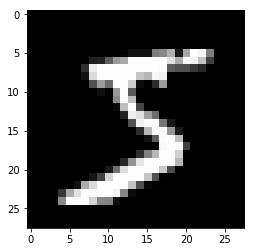

In [12]:
#print(X_train[0])
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) 
plt.show()

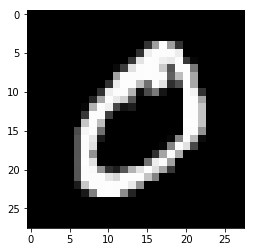

In [13]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray')) 
plt.show()

In [16]:
A = X_train[0]
print(A.shape)
print(A)
B = A.reshape(A.shape[0] * A.shape[1])
print('B=', B)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [18]:
print(y_train, y_train.shape)

[5 0 4 ..., 5 6 8] (60000,)


In [19]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 

In [22]:
print(y_train.shape)
print(y_train[:5])

(60000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [30]:
# fix random seed for reproducibility 
seed = 7
numpy.random.seed(seed) 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2] 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') 
X_train = X_train / 255
X_test = X_test / 255 
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model 
def baseline_model(): 
    # create model 
    model = Sequential()
    # New algorithm test(selu - 2017)
    # model.add(Dense(num_pixels, input_dim=num_pixels, init='normal'))
    # model.add(Activation('selu'))
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax')) 
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model 
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


C:\Users\VIP606\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, kernel_initializer="normal")`
C:\Users\VIP606\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="normal", activation="softmax")`
C:\Users\VIP606\AppData\Local\conda\conda\envs\py35\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.3467 - acc: 0.8983 - val_loss: 0.2571 - val_acc: 0.9255
Epoch 2/10
8s - loss: 0.2338 - acc: 0.9331 - val_loss: 0.1897 - val_acc: 0.9447
Epoch 3/10
8s - loss: 0.1742 - acc: 0.9506 - val_loss: 0.1607 - val_acc: 0.9527
Epoch 4/10
8s - loss: 0.1328 - acc: 0.9612 - val_loss: 0.1351 - val_acc: 0.9618
Epoch 5/10
8s - loss: 0.1050 - acc: 0.9702 - val_loss: 0.1116 - val_acc: 0.9669
Epoch 6/10
8s - loss: 0.0851 - acc: 0.9746 - val_loss: 0.1019 - val_acc: 0.9694
Epoch 7/10
8s - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0999 - val_acc: 0.9690
Epoch 8/10
8s - loss: 0.0583 - acc: 0.9828 - val_loss: 0.0885 - val_acc: 0.9758
Epoch 9/10
8s - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0813 - val_acc: 0.9747
Epoch 10/10
8s - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0839 - val_acc: 0.9747
Baseline Error: 2.53%
